# <span style="color:RoyalBlue">Introducción a librerías básicas para uso científico</span>



## <span style="color:CornflowerBlue">**SciPy**</span>
[SciPy](https://scipy.org/) (**Sci**-entific **Py**-thon) es la biblioteca estándar de cálculo científico de Python.
Contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales e imágenes, solucionadores de ODE y otras tareas comunes en ciencia e ingeniería 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b2/SCIPY_2.svg" width = 300>

SciPy se basa y construye a partir de las herramientas para calcular y manipular matrices multidimensionales de manera eficiente que brinda Numpy. Proporciona un gran número de funciones que operan en matrices numpy.

## Inicio

El primer requisito, para trabajar con esta bibliotecas es importarla:

In [5]:
import scipy as sp

## Contenido de SciPy
Actualmente SciPy contiene 15 sub paquetes que se pueden importar independientemente y tienen diferentes utilidades:

* [cluster:](https://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster) contiene implementaciones para algoritmos de agrupaciones o clustering
* [constants:](https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) contiene la definición de varias constantes matemáticas y físicas
* [fft:](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft) implementa varias transformaciones como Transformada Rápida de Fourier, Transformaciones Discretas Seno y Coseno, Transformación Rápida de Hankel
* [integrate:](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) funciones de integration y para resolver ecuaciones diferenciales ordinarias
* [interpolate:](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) contiene varias alternativas para interpolación de datos
* [io:](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io) contiene módulos para leer y escribir diferentes tipos de archivos
* [linalg:](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) módulos de álgebra lineal
* [ndimage:](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) funciones para el procesamiento de imágenes multidimensionales
* [odr:](https://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr) implementación de regresión de distancia ortogonal
* [optimize:](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) funciones para minimizar funciones objetivo
* [signal:](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) funciones para el procesamiento de señales
* [sparse:](https://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse) funciones para operar numéricamente con matrices 2-D esparsas
* [spatial:](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial) algoritmos y estructuras de datos espaciales
* [special:](https://docs.scipy.org/doc/scipy/tutorial/special.html) implementa varias funciones matemáticas: airy, bessel, beta, hypergeometric, mathieu y kelvin
* [stats:](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) varias funciones para cálculos estadísticos y de correlaciones


### Interpolación
Una de las funcionalidades interesantes para trabajar con datos es la interpolación. Supongamos que tenemos muestras de una función coseno:

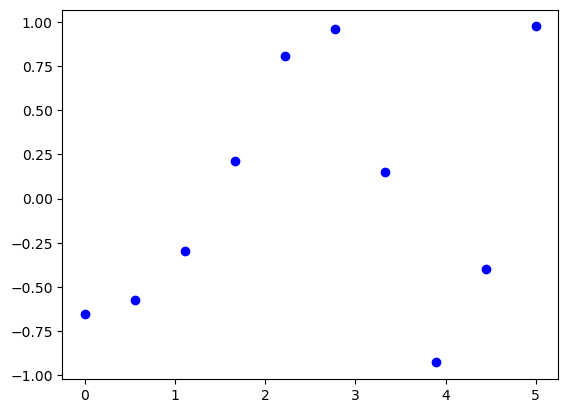

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  

x = np.linspace(0, 5, 10)  
y = np.cos(x**2/3+4) 
plt.scatter(x, y, c='b')  
plt.show()

Y que queremos interpolar estos puntos. Eso se puede hacer con el subpaquete *interpolate*:

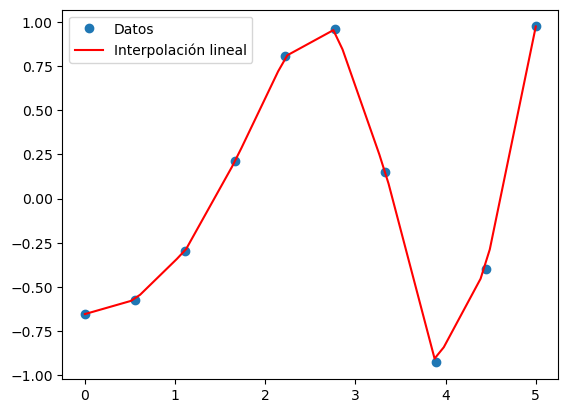

In [4]:
from scipy import interpolate

# se define una función de interpolación lineal
fun1 = interpolate.interp1d(x, y,kind = 'linear')  
# puntos que se quieren interpolar
x_new = np.linspace(0, 5, 50) 

plt.plot(x, y, 'o', x_new, fun1(x_new), '-r')  
plt.legend(['Datos', 'Interpolación lineal'], loc = 'best')  
plt.show()

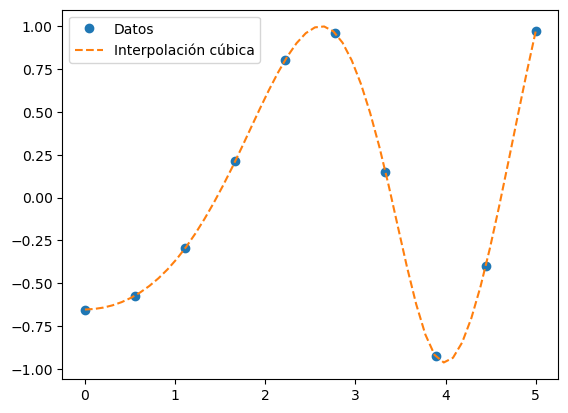

In [5]:
# Otra función de interpolación: interpolación cúbica
fun2 = interpolate.interp1d(x, y, kind = 'cubic')  

plt.plot(x, y, 'o', x_new, fun2(x_new), '--')  
plt.legend(['Datos', 'Interpolación cúbica'], loc = 'best')   

## FFT

Generamos una señal sinusoidal

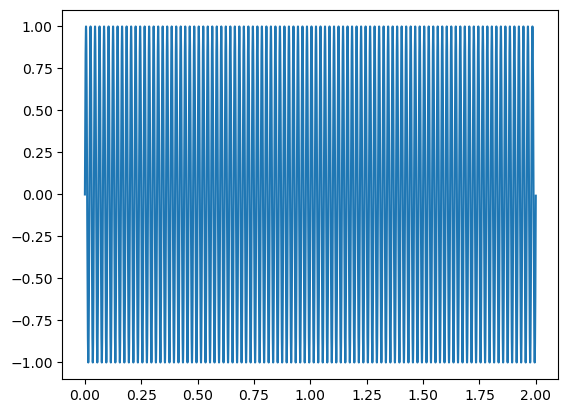

In [27]:
import numpy as np
from matplotlib import pyplot as plt

def generate_sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)  # vector de tiempos (samples)
    y = np.sin(2 * np.pi * freq * t)
    return t, y

# Generamos onda seno con duración específica
frequency = 50  # Hertz
duration = 2  # seconds
sample_rate = 44100  # Hertz
t, y = generate_sine_wave(frequency, sample_rate, duration)

# Graficación
plt.plot(t, y)
plt.show()


Realizamos la FFT

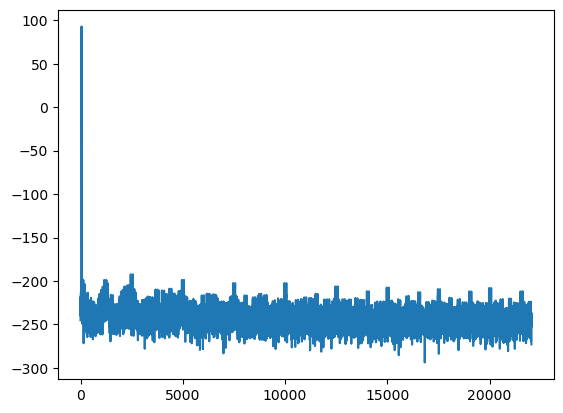

In [28]:
from scipy.fft import rfft, rfftfreq

N = sample_rate * duration  # cantidad de samples de la señal (usamos la misma resolución para la FFT)

Yf = rfft(y, N)  # transformada discreta de Fourier a partir de una señal con números reales
Yf_dB = 20 * np.log10(np.abs(Yf))  # convertimos a dB
Xf = rfftfreq(N, 1 / sample_rate)  # genera las frecuencias para la FFT

plt.plot(Xf, Yf_dB)
plt.show()
